# Association Rule - Assignment 9

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import itertools


from mlxtend.frequent_patterns import apriori,association_rules



import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
data=movie.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Data Exploration -  Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [6]:
data[data.duplicated()]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0


In [7]:
data.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
#Most popular items
count=data.iloc[:,:].sum().sort_values(ascending=False)
count

Gladiator        7
Sixth Sense      6
Patriot          6
LOTR1            2
Harry Potter1    2
LOTR2            2
Green Mile       2
Harry Potter2    1
LOTR             1
Braveheart       1
dtype: int64

In [9]:
data.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [10]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64
Gladiator
1    7
0    3
Name: Gladiator, dtype: int64
LOTR1
0    8
1    2
Name: LOTR1, dtype: int64
Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64
Patriot
1    6
0    4
Name: Patriot, dtype: int64
LOTR2
0    8
1    2
Name: LOTR2, dtype: int64
Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64
LOTR
0    9
1    1
Name: LOTR, dtype: int64
Braveheart
0    9
1    1
Name: Braveheart, dtype: int64
Green Mile
0    8
1    2
Name: Green Mile, dtype: int64


# Data Visualisation

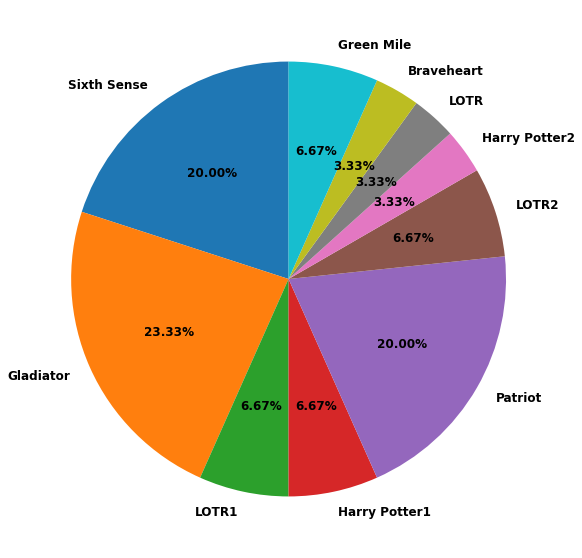

In [11]:
plt.figure(figsize=(15,10))

plt.pie(data.sum(),labels=data.columns,
        autopct='%.2f%%',
        startangle=90,
       textprops={'size':'large',
                 'color':'black',
                 'fontweight':'bold'})
plt.show()


In [12]:
count=count.to_frame().reset_index()
count=count.rename(columns={'index':'Items',0:'count'})
count

,Items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


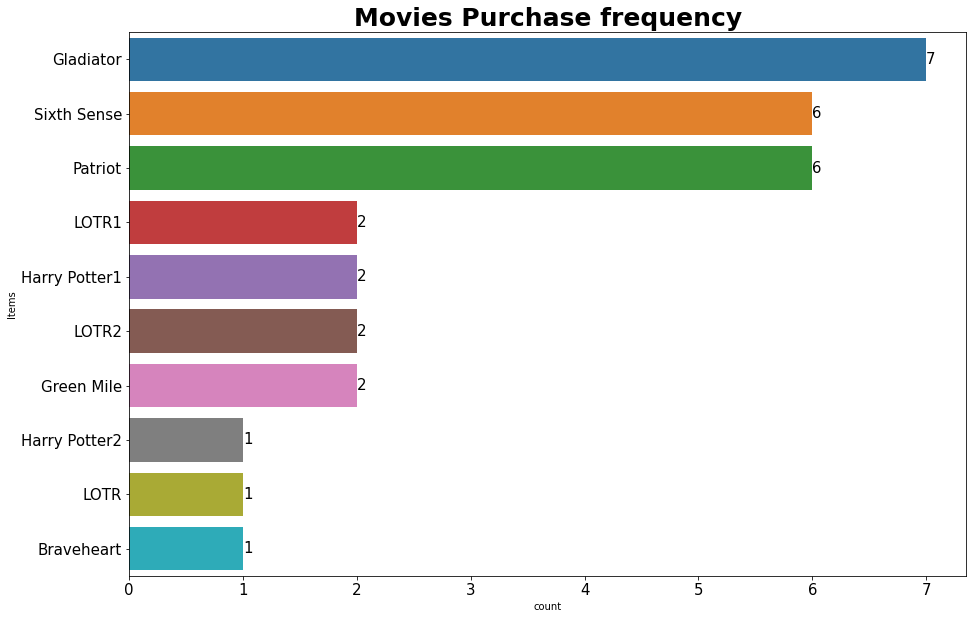

In [13]:
plt.figure(figsize=(15,10))

ax=sn.barplot(x='count',y='Items',data=count)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Movies Purchase frequency',fontsize=25,fontweight='bold')

for i in ax.containers:
    ax.bar_label(i,fontsize=15)

# MOst rated movies are Glatitaor,sixth sense.
 Support and Length
 
if we divide allitems with row number , we can find support value.
Our threshold value is 0.2 for support value.


In [14]:
s1=pd.DataFrame(data.sum()/data.shape[0],columns=['Support']).sort_values('Support',ascending=False)
s1

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [15]:
# Elimination by support value
s1[s1.Support>=0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [16]:
# Elimination by support value
s1[s1.Support>=0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [17]:
# Elimination by support value
s1[s1.Support>=0.2]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [18]:
s2= list(itertools.combinations(s1.index, 2))
s2 = [list(i) for i in s2]
# Sample of combinations
s2[:10]

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [19]:
value=[]
for i in range(0,len(s2)):
    temp=data.T.loc[s2[i]].sum()
    temp = len(temp[temp == data.T.loc[s2[i]].shape[0]]) / data.shape[0]
    value.append(temp)

In [20]:
# Create dataframe
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in s2]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2
"(Harry Potter1, Harry Potter2)",0.1,2
"(LOTR1, Green Mile)",0.1,2
"(LOTR1, Harry Potter1)",0.1,2
"(Patriot, Braveheart)",0.1,2


In [21]:
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration


,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [22]:
s2=list(itertools.combinations(s1.index,3))
s2=[list(i) for i in s2]
s2[:10]

[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [23]:
# Finding support values
value = []
for i in range(0, len(s2)):
    temp = data.T.loc[s2[i]].sum() 
    temp = len(temp[temp == data.T.loc[s2[i]].shape[0]]) / data.shape[0]
    value.append(temp)
    
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in s2]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


In [24]:
s2=list(itertools.combinations(s1.index, 4))
s2= [list(i) for i in s2]
# Sample of combinations
s2[:10]

[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [25]:
# Finding support values
value = []
for i in range(0, len(s2)):
    temp = data.T.loc[s2[i]].sum() 
    temp = len(temp[temp == data.T.loc[s2[i]].shape[0]]) / data.shape[0]
    value.append(temp)
    
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in s2]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


# Association rules with 10% Support and 30% confidence

In [26]:
# With 10% Support
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


# Head 5

60 percent of 100 purchases are Sixth Sense,
70 percent of 100 purchases are Gladiator,
20 percent of 100 purchases are LOTR1,
20 percent of 100 purchases are Harry Potter,
60 percent of 100 purchases are Patriot

# Tail 5

10 percent of 100 purchases are Green Mile, LOTR1, Harry Potter1, Sixth Sense,
10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Sixth Sense,
10 percent of 100 purchases are Green Mile, LOTR2, Harry Potter1, Sixth Sense,
10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Harry Potter1,
10 percent of 100 purchases are Sixth Sense, LOTR2, Harry Potter1, Green Mile, LOTR1

In [28]:
# For 30% confidence level
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
212,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [29]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
126,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
181,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
193,"(LOTR1, LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
156,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
119,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
41,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6


In [30]:
# Lift ratio values >1 then it is a goof=d influential rule in selecting the assiciation.
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
212,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


# Data Visualisation of rule

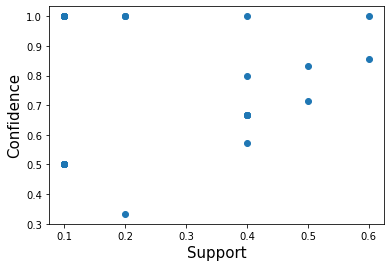

In [31]:
plt.scatter(rules['support'],rules['confidence'],)
plt.xlabel('Support',fontsize=15)
plt.ylabel('Confidence',fontsize=15)
plt.show()

In [32]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Gladiator),"(Harry Potter1, Green Mile)","(LOTR1, Green Mile)","(LOTR2, Green Mile)","(Sixth Sense, Green Mile, Gladiator)","(LOTR, Sixth Sense, Gladiator)","(Harry Potter1, LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)","(LOTR1, Harry Potter1, Sixth Sense)","(Harry Potter1, Sixth Sense, Green Mile)",...,"(LOTR1, LOTR2, Sixth Sense)","(Patriot, Sixth Sense)","(Harry Potter1, Sixth Sense)","(LOTR1, Sixth Sense)","(LOTR2, Sixth Sense)","(Sixth Sense, Green Mile)","(LOTR, Sixth Sense)","(Green Mile, Gladiator)","(Patriot, Gladiator)","(LOTR1, Harry Potter1, LOTR2, Sixth Sense)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111,NaN
"(LOTR, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR1, LOTR2)",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN
"(LOTR, Sixth Sense, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Sixth Sense, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,5.0,5.0,2.5,NaN,NaN,NaN,NaN
"(LOTR, Green Mile, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Heatmap for Lift Matrix')

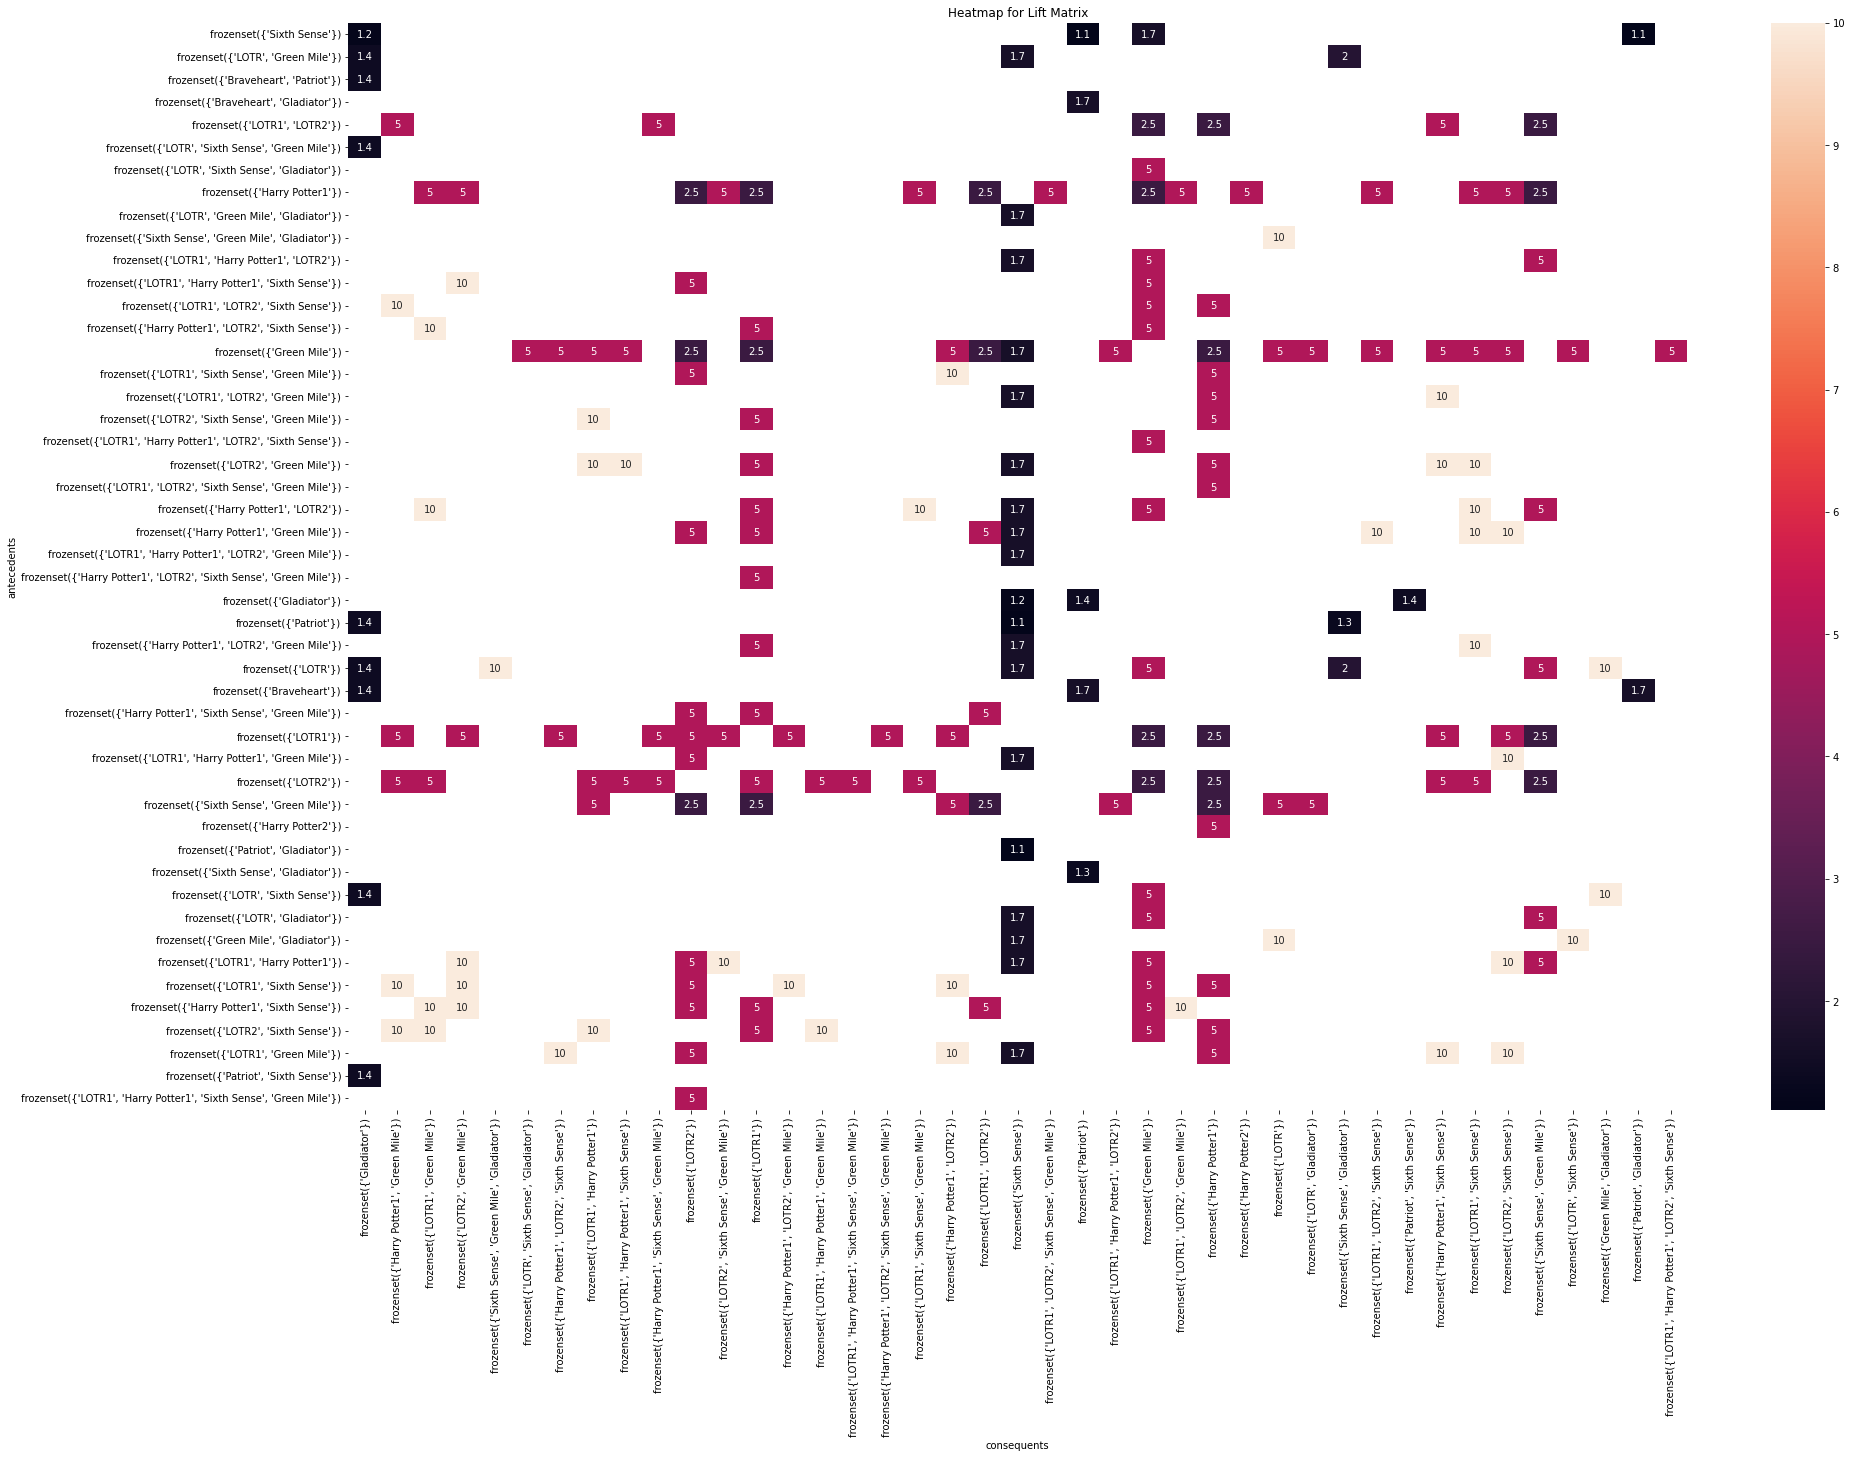

In [33]:
plt.figure(figsize=(30,20))
sn.heatmap(matrix,annot=True)
plt.title('Heatmap for Lift Matrix')

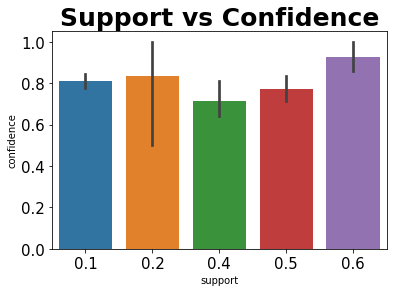

In [34]:
sn.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence",fontsize=25,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

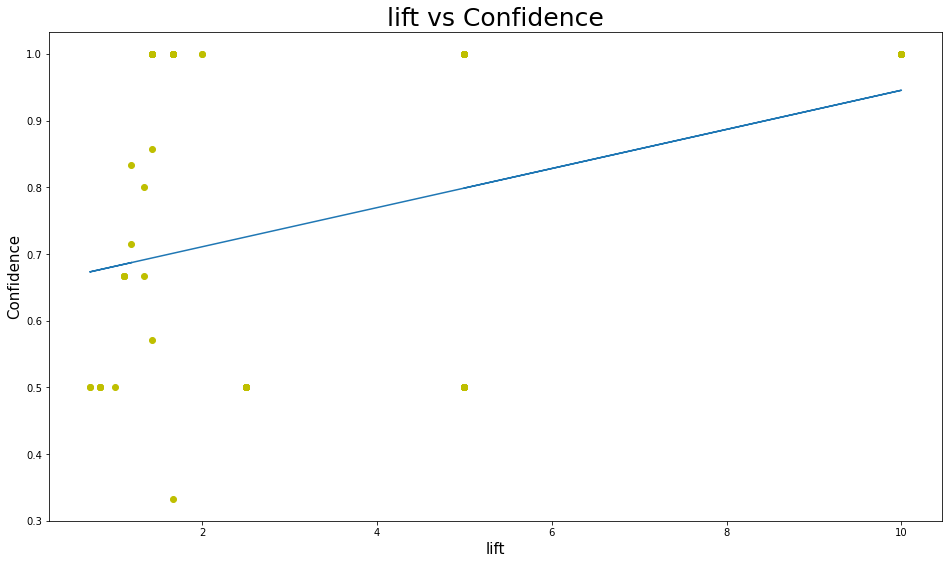

In [35]:
plt.figure(figsize=(16,9))

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)

plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))
plt.xlabel('lift',fontsize=15)
plt.ylabel('Confidence',fontsize=15)
plt.title('lift vs Confidence',fontsize=25)

# Association rules with 15% support and 40% confidence

In [36]:
# With 15% Support
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [37]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
14,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
12,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [38]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


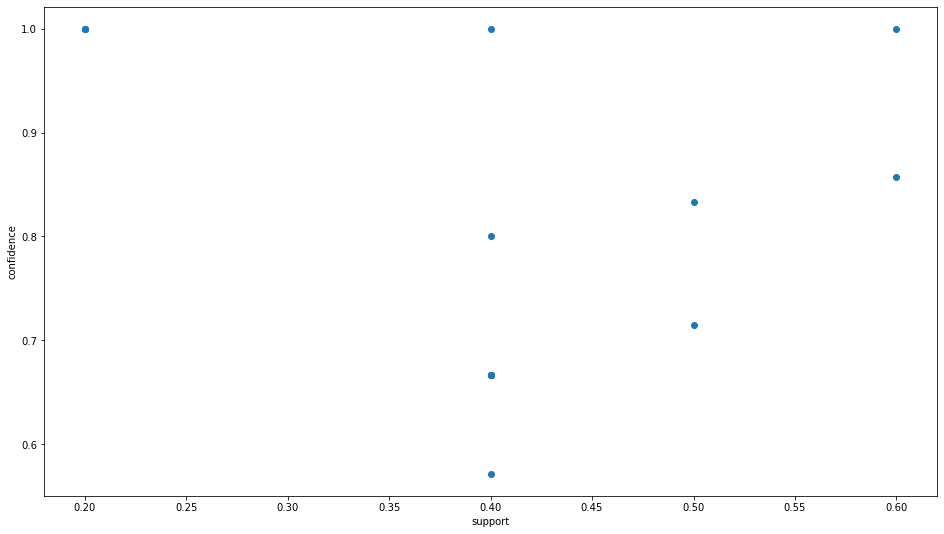

In [39]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


In [40]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Sixth Sense, Gladiator)","(Patriot, Gladiator)","(Patriot, Sixth Sense)"
antecedents,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,NaN,1.111111,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,1.428571
(Patriot),1.428571,1.111111,NaN,NaN,NaN,1.333333,NaN,NaN
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Patriot, Sixth Sense)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Patriot, Gladiator)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN


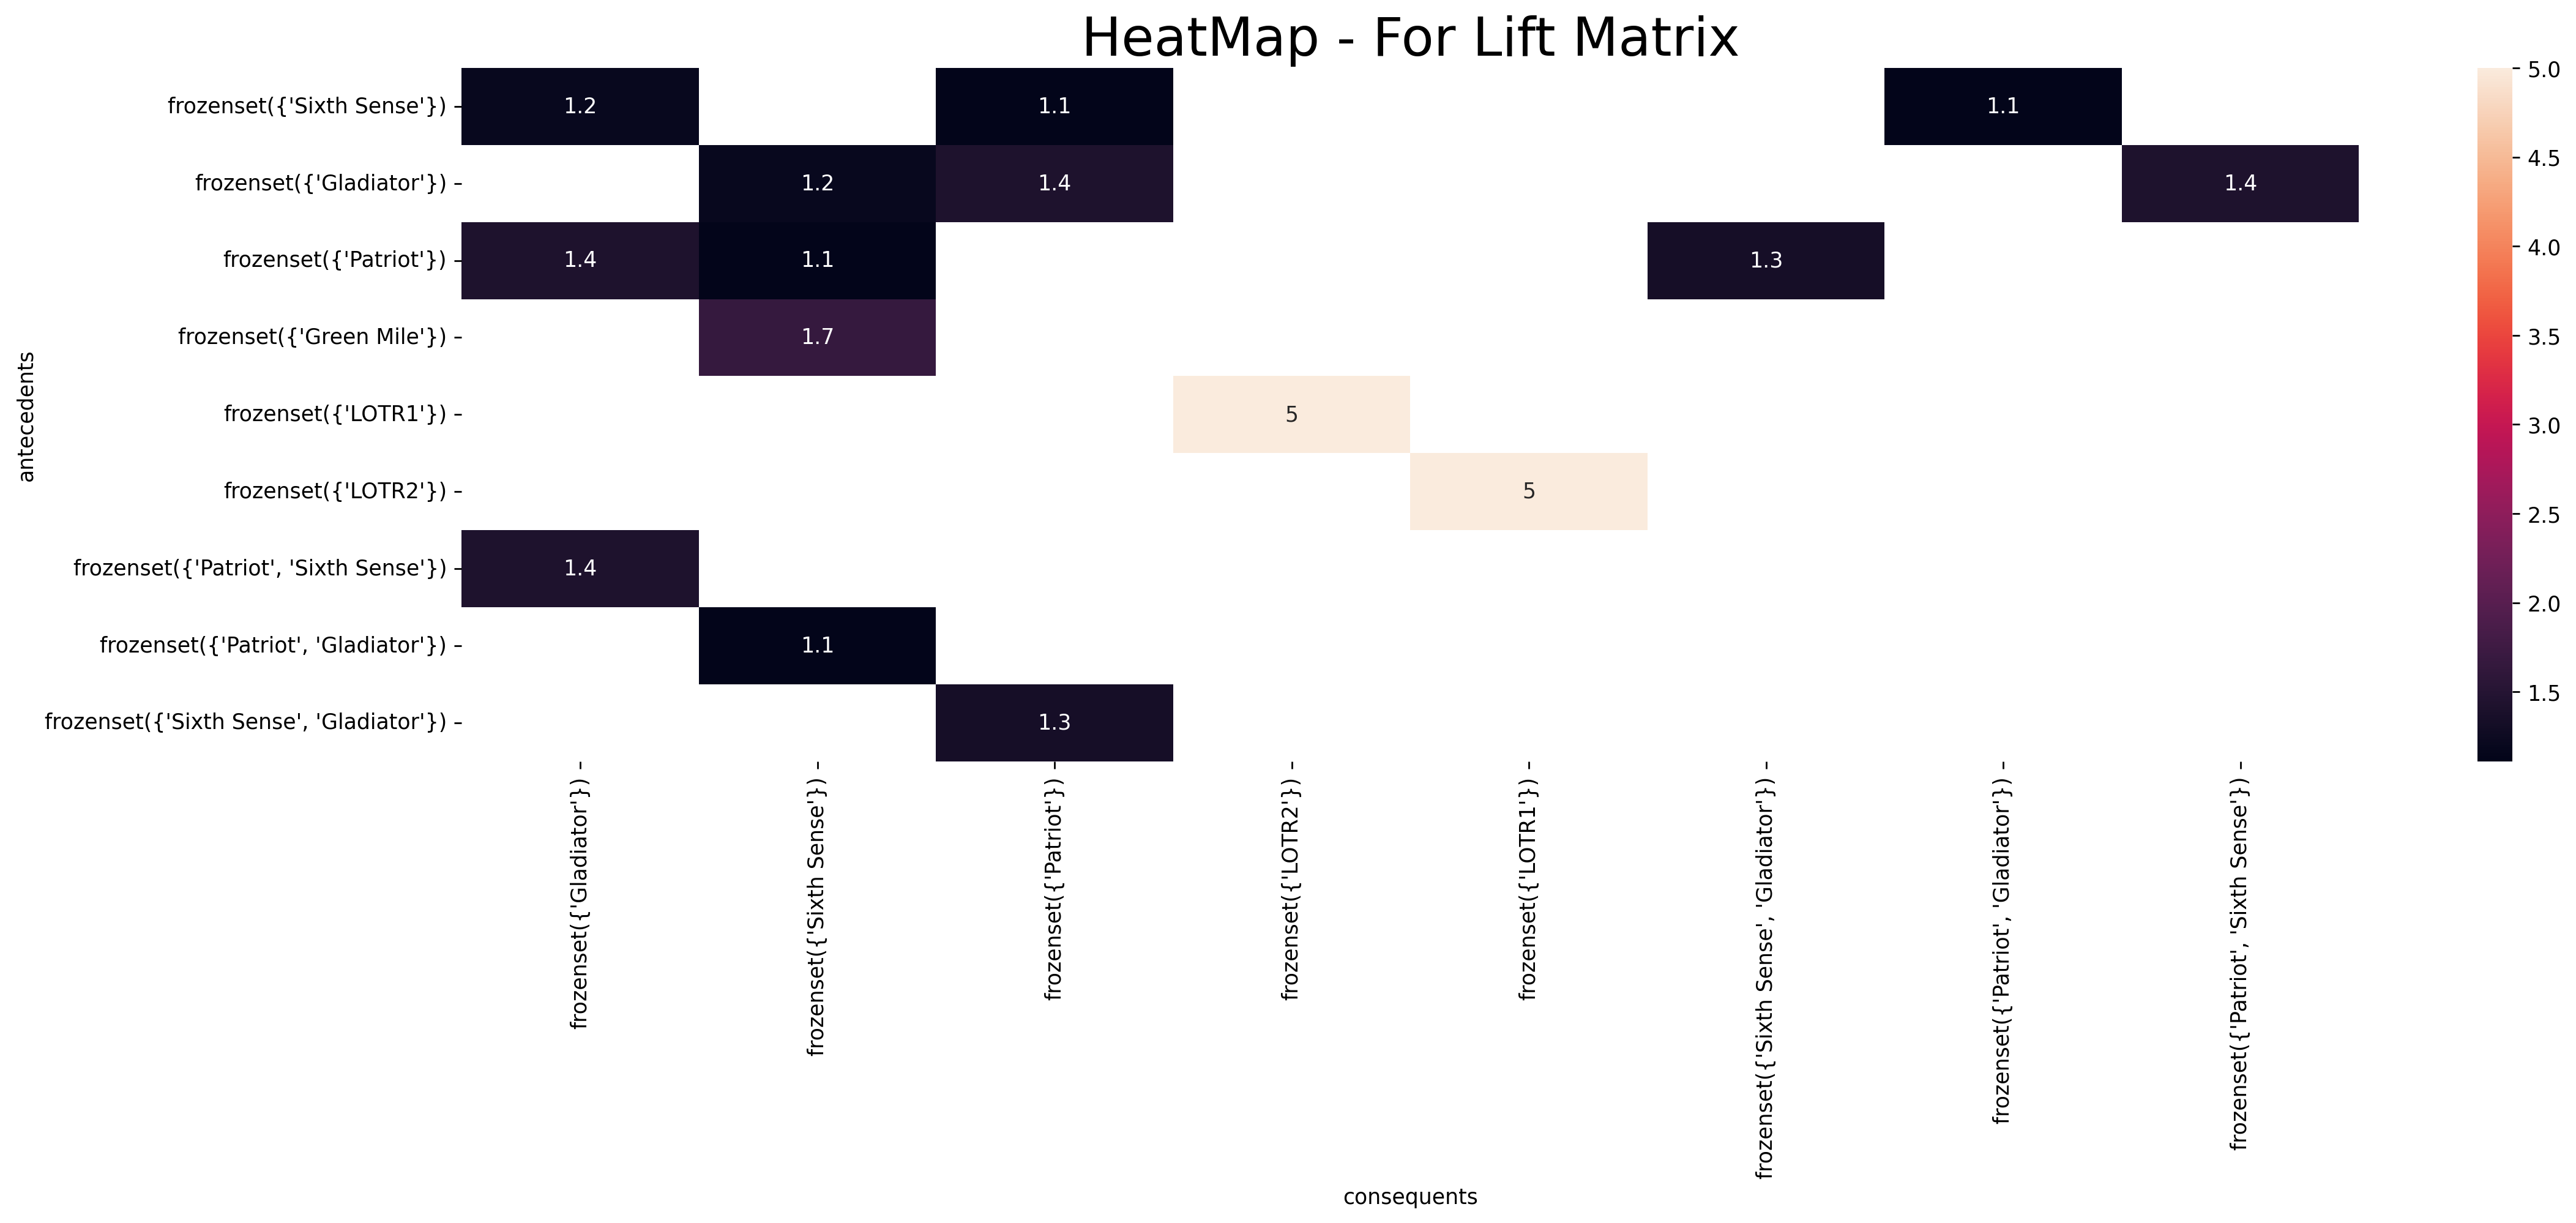

In [41]:
plt.figure(figsize=(20,6),dpi=250)
sn.heatmap(matrix,annot=True)
plt.title('HeatMap - For Lift Matrix',fontsize=25)
plt.show()


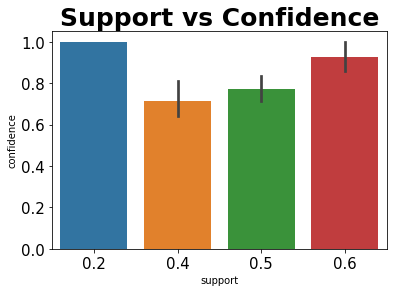

In [42]:
sn.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence",fontsize=25,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


Text(0.5, 1.0, 'lift vs Confidence')

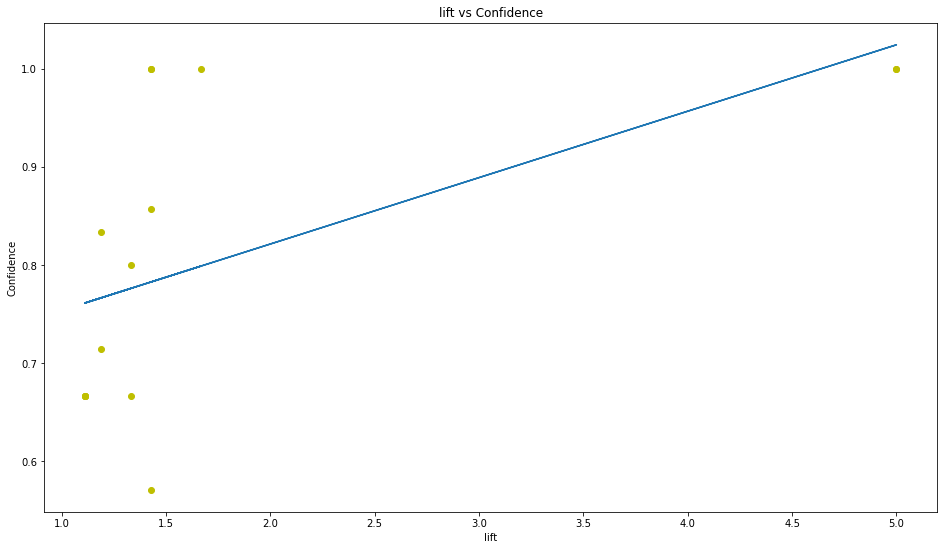

In [43]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')


# Conclusion:
So we conclude that in the Association rules increae in support and confidence then there is less association.

We can use 15% support and 40% confidence level for association/selling/offering movies.
